In [1]:
##Data Source:
#### http://ec.europa.eu/eurostat/data
#### http://ec.europa.eu/eurostat/web/products-datasets/-/ilc_di03

##Definition:
####http://measuring-progress.eu/median-equivalised-net-income

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.interpolate import UnivariateSpline

warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline


### Loading Data

In [5]:
## Load tab delimited "mean and median income by age and sex - EU-SILC survey (ilc_di03)" to pandas dataframe
file =pd.read_csv('./data/ilc_di03.tsv', sep='\t', header=0)

### Data preparation

In [4]:
#Split 'age,sex,indic_il,unit,geo\\time' to separate columns
file['Age'],file['Sex'],file['Indic_il'],file['Unit'],file['Country'] =file.loc[:,'age,sex,indic_il,unit,geo\\time'].str.split(',').str
file.drop('age,sex,indic_il,unit,geo\\time', axis =1, inplace=True)

#Replace ":" win NAN values
file.replace(': ', np.nan, inplace=True)

#Remove special characters
file.replace({' e': ''},regex=True, inplace=True)
file.replace({' b': ''},regex=True, inplace=True)

In [5]:
#Dictionary mapping coutry code to country name
coutry_codes={'AT':'Austria', 'BE':'Belgium', 'BG':'Bulgaria', 'CH':'Switzerland', 'CY':'Cyprus', 'CZ':'Czech Republic', 'DE':'Germany', 'DK':'Denmark',
       'EE':'Estonia', 'EL':'Greece', 'ES':'Spain', 'FI':'Finland', 'FR':'France',
       'HR':'Croatia', 'HU':'Hungary', 'IE':'Ireland', 'IS':'Icland', 'IT':'Italy', 'LT':'Lithuania', 'LU':'Luxembourg', 'LV':'Latvia', 'MK':'Former Yugoslav Republic of Macedonia', 'MT':'Malta', 'NL':'Netherlands',
       'NO':'Norway', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 'RS':'Serbia', 'SE':'Sweden', 'SI':'Slovenia', 'SK':'Slovakia', 'TR':'Turkey', 'UK':'United Kingdom'}

In [6]:
#Replacing Country codes with country names
file.replace({"Country": coutry_codes}, inplace =True)

In [7]:
# Data structure change

cols = list(file.columns.values)        #Make a list of all of the columns in the file df
cols.pop(cols.index('Age'))             #Remove 'Age' from list
cols.pop(cols.index('Country'))    #Remove 'Country_Code' from list
cols.pop(cols.index('Indic_il'))        #Remove 'Indic_il' from list
cols.pop(cols.index('Sex'))             #Remove 'Sex' from list
cols.pop(cols.index('Unit'))            #Remove 'Unit' from list

#Create new dataframe with columns in the order I want
file = file[['Age','Indic_il','Sex','Unit','Country']+sorted(cols)]

file.head()

,Age,Indic_il,Sex,Unit,Country,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,TOTAL,MED_E,F,EUR,Austria,13394,14277,13841,13677,13888,...,18838,20030,20566,20949,21183,21629,22712,22741,23202,NaN
1,TOTAL,MED_E,F,EUR,Belgium,13085,13735,13707,13669,13885,...,17592,18851,18963,19380,19688,20878,21189,21012,21526,NaN
2,TOTAL,MED_E,F,EUR,Bulgaria,NaN,NaN,NaN,NaN,NaN,...,2131,2762,2925,2814,2776,2860,3260,3236,3043,NaN
3,TOTAL,MED_E,F,EUR,Switzerland,NaN,NaN,NaN,NaN,NaN,...,26114,28003,29780,32911,38156,39783,37278,38361,43091,NaN
4,TOTAL,MED_E,F,EUR,Cyprus,NaN,NaN,NaN,NaN,NaN,...,15677,16005,15839,16580,16502,15437,14186,13618,13854,NaN


# Visualization

### Visualization of "Median equivalised net income grow in Poland"

In [8]:
# Data set used for plot
fplot=file.iloc[:,4:][(file.Country=="Poland") & (file.Age =='TOTAL') & (file.Indic_il=='MED_E') &
               (file.Sex =='T') & (file.Unit=='NAC')].set_index('Country')
fplot

,1995,1996,1997,1998,1999,2000,2001,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Poland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11467,...,15720,17903,19065,20075,20849,21610,22399,23247,24618,NaN


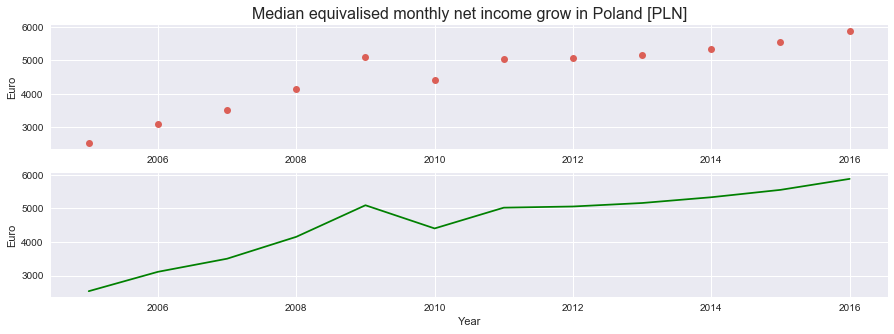

In [21]:
plt.figure(figsize=(15,5))                                          # Setting up plot size

plt.subplot(2,1,1)                                                  # Setting up plot grid and plot position on it
plt.title("Median equivalised monthly net income grow \
in Poland [PLN]",{'size':'16'})                                     # Plot title and it's size

plt.ylabel("Euro")                                                  # Y - Label
plt.plot(fplot.loc['Poland'],'o')                                   # Plot data with dot as marker

plt.subplot(2,1,2)
plt.xlabel("Year")                                                  # X - Label
plt.ylabel("Euro")                                                  # Y - Label
plt.plot(fplot.loc['Poland'],'-', color='green');                   # Plot data with line as marker and color setup

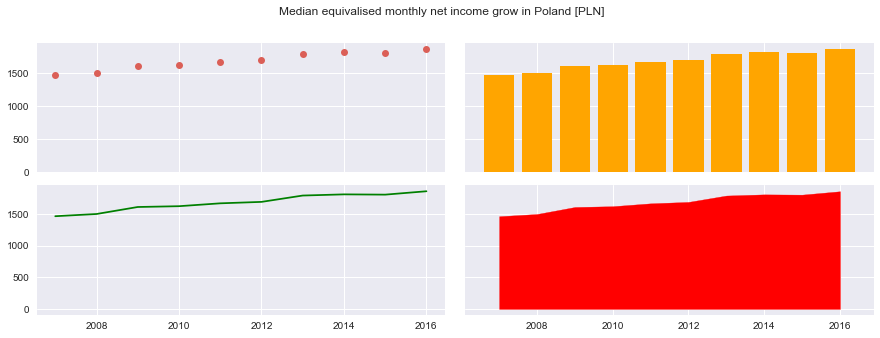

In [26]:
x = fplot.dropna(axis=1).columns.astype(int).tolist()
y = (fplot.dropna(axis=1).values[0].astype(int)/12).tolist()



fig, ax =plt.subplots(2, 2, figsize=(15,5), sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.1, wspace=0.05)
plt.suptitle('Median equivalised monthly net income grow in Poland [PLN]')

ax[0,0].plot(x,y,'o')
ax[1,0].plot(x,y,'-', color='green');
ax[0,1].bar(x,y, color ='orange');
ax[1,1].stackplot(x,y, color ='red');

In 2020, median equivalised monthly net income in Poland will grow to  2052.8 zlotych per year


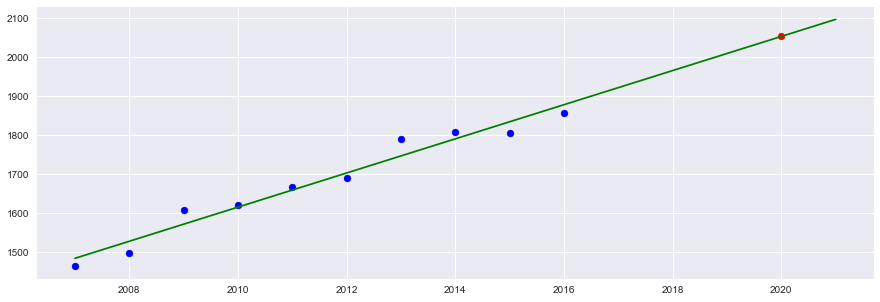

In [25]:
fit = np.polyfit(x, y, deg=1)
plt.figure(figsize=(15,5))

x_n=x + [2020,2021]
y_n =[i*fit[0] +fit[1] for i in x_n]
print('In 2020, median equivalised monthly net income in Poland will grow to ', str(round(y_n[-2],1)), 'zlotych per year')


plt.scatter(x,y, color = 'blue')
plt.scatter(x_n[-2],y_n[-2], color='red')
plt.plot(x_n,y_n, color='green');

### Visualization of "Median equivalised net income grow comparison"

In [12]:
# Data set used for plot
fplot=file[(file.Age =='TOTAL')
           & (file.Country.isin(['Poland','Belgium', 'Spain', 'Slovakia', 'France', 'Greece','Romania','United Kingdom']))
           & (file.Indic_il=='MED_E')
           & (file.Sex =='T')
           & (file.Unit=='EUR')].drop(['Age', 'Sex','Indic_il','Unit'], axis=1).set_index('Country')
fplot

,1995,1996,1997,1998,1999,2000,2001,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Belgium,13405,14111,14089,14027,14200,14778,15492,15522,15674,16581,...,17985,19313,19464,20008,20280,21483,21705,21654,22295,NaN
Greece,5208,5467,5891,6413,6350,6924,7119,8206,8844,9417,...,10800,11496,11963,10985,9513,8371,7680,7520,7500,NaN
Spain,6173,6247,6619,6796,7485,8236,9034,NaN,10327,10453,...,13966,14795,14605,13929,13868,13524,13269,13352,13681,NaN
France,12653,13191,13353,13557,13814,14104,14889,NaN,15242,15946,...,18899,19644,19960,19995,20603,20924,21199,21415,21713,NaN
Poland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2533,...,4155,5097,4405,5025,5060,5164,5336,5556,5884,NaN
Romania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1952,2172,2036,2091,2049,2016,2155,2315,2448,NaN
Slovakia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2830,...,4792,5671,6117,6306,6927,6737,6809,6930,6951,NaN
United Kingdom,10429,10188,10962,13606,13814,15444,17724,NaN,NaN,18540,...,18923,16262,17106,17136,19166,18694,20528,21028,21136,NaN


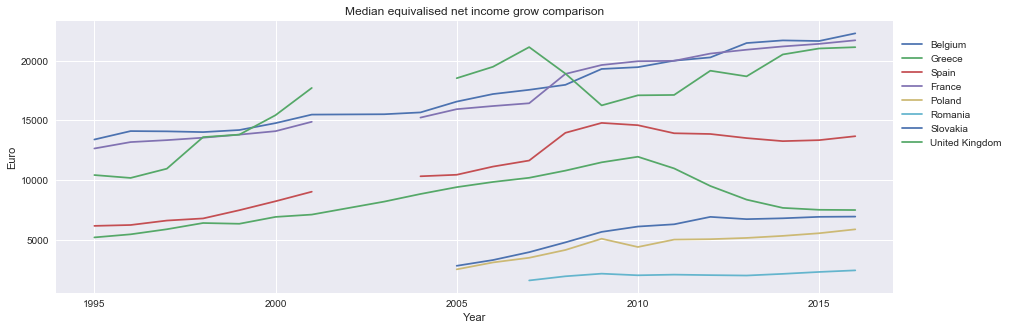

In [13]:
plt.figure(figsize=(15,5))                                                      # Setting up plot size
for index, row in fplot.iterrows():                                             # Iterate through dataframe content 
    plt.plot(row, label =index)                                                 # and plot data for each country
    
plt.title("Median equivalised net income grow comparison")
plt.xlabel('Year')
plt.ylabel("Euro")
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5), ncol=1);                  # Plot Legeng and set up it's position

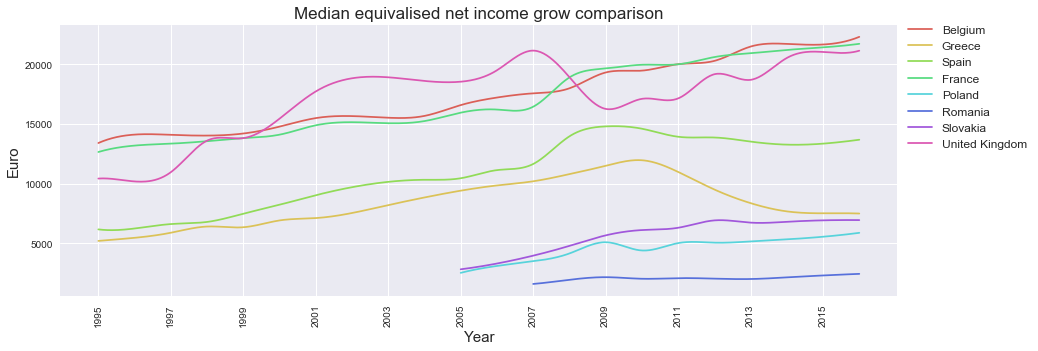

In [14]:
plt.figure(figsize=(15,5))                                                         # Setting up plot size

sns.set_palette(sns.color_palette("hls", len(fplot.index)))                        # Create a palette with unique colors


for index, row in fplot.iterrows():                                                # Interpolatinh NAN values
    y=row.interpolate(method='linear').dropna().values
    x=row.interpolate(method='linear').dropna().index.values.astype(float)
    
    x_s = np.linspace(x.min(),x.max(),500)                                         # Smoothing lines with Spline
    s = UnivariateSpline(x,y, k=3)
    y_s = s(x_s)
   
    plt.plot(x_s, y_s, label =index)

plt.title("Median equivalised net income grow comparison",{'size':'17'})
plt.xticks(np.arange(x.min(), x.max()+1, 2.0), rotation='vertical')                # Xticks roattion and distribution change 
plt.xlabel('Year', fontsize=15)
plt.ylabel("Euro", fontsize=15)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5), ncol=1, prop={'size': 12});  # Plot Legend and set up it's position
